In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## Format the stockerbot data

In [45]:
stockerbot = pd.read_csv("/Users/kelseyesposito/finBERT/data/sentiment_data/stockerbot-export.csv", error_bad_lines=False)

b'Skipping line 731: expected 8 fields, saw 13\nSkipping line 2836: expected 8 fields, saw 15\nSkipping line 3058: expected 8 fields, saw 12\nSkipping line 3113: expected 8 fields, saw 12\nSkipping line 3194: expected 8 fields, saw 17\nSkipping line 3205: expected 8 fields, saw 17\nSkipping line 3255: expected 8 fields, saw 17\nSkipping line 3520: expected 8 fields, saw 17\nSkipping line 4078: expected 8 fields, saw 17\nSkipping line 4087: expected 8 fields, saw 17\nSkipping line 4088: expected 8 fields, saw 17\nSkipping line 4499: expected 8 fields, saw 12\n'


## Formatting the datasets to combine them

In [46]:
stockerbot = stockerbot[["text", "timestamp", "symbols"]]
stockerbot.rename(columns={"timestamp":"date","symbols":"ticker"}, inplace=True)
stockerbot.reset_index(drop=True, inplace=True)
stockerbot["date"] = pd.to_datetime(stockerbot["date"])
stockerbot = stockerbot[['date','ticker','text']]
stockerbot.head()

,date,ticker,text
0,2018-07-18 21:33:26+00:00,GS,VIDEO: “I was in my office. I was minding my o...
1,2018-07-18 22:22:47+00:00,M,The price of lumber $LB_F is down 22% since hi...
2,2018-07-18 22:32:01+00:00,AIG,Who says the American Dream is dead? https://t...
3,2018-07-18 22:52:52+00:00,BTC,Barry Silbert is extremely optimistic on bitco...
4,2018-07-18 23:00:01+00:00,ORCL,How satellites avoid attacks and space junk wh...


## Format CorrectCleanData.csv

In [ ]:
correctcleandata = pd.read_csv("/Users/kelseyesposito/finBERT/data/sentiment_data/CorrectCleanData.csv");

In [64]:
ccd = correctcleandata[["TWEET", "STOCK", "DATE"]]
ccd["DATE"] = pd.to_datetime(ccd["DATE"],utc=True)
ccd.rename(columns={"TWEET":"text", "STOCK":'company', "DATE":"date"}, inplace=True)
ccd.head()

<ipython-input-64-24c3e4be4911>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccd["DATE"] = pd.to_datetime(ccd["DATE"],utc=True)
/Users/kelseyesposito/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,text,company,date
0,RT @robertoglezcano: @amazon #Patents Show Fl...,Amazon,2017-01-31 00:00:00+00:00
1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31 00:00:00+00:00
2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,2017-01-31 00:00:00+00:00
3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,2017-01-31 00:00:00+00:00
4,RT @loadsofvans: Retweet this post &amp; follo...,Amazon,2017-01-31 00:00:00+00:00


In [65]:
ccd_tickers = ['AMZN','PYPL','DIS','FB','SBUX','EBAY','TRI','CBS','NFLX','AAPL','DB','PEP','GOOGL',
              'HSBC','F','MS','MCD','TSCDD','ESYJY','GE','ADBE','MSFT','BURBY','RYAAY',
              'FDX','HP','BP','BAYRY','IBM','ORCL','NKE','CSCO','V','GS','VWAGY',
              'AXP','XOM','WFC','AUDVF','BMWYY','DE','LRLCY','KR','T','HYMTF','AABA','CRM',
              'TM','C','SAP','HNNMY','RDS.A','WMT','SNE','CVX','HMC','ASC.L','HD','NSANY',
              'NEXT','PFE','VZ','BA','GILLETTE','INTC','TMUS','CMCSA','EXPE','NSRGY',
               'BAC','ADDYY','TRIP','KO','THLLY','UPS','TFCF','BLK','MA','K','005930','JPM',
              'HEINY','GSK','ALIZY','VOD','SIEGY','CRRFY','GRPN','AZN','VIAC','SAN','COST',
              'BKNG','CVS','PG','BASFY','CL','DANOY', 'CAH','EQNR']
ccd_companies = ['Amazon', 'PayPal', 'Disney', 'Facebook', 'Starbucks', 'eBay',
       'Reuters', 'CBS', 'Netflix', 'Apple', 'Deutsche Bank', 'Pepsi',
       'Google', 'HSBC', 'Ford', 'Morgan Stanley', "McDonald's", 'Tesco',
       'easyJet', 'General Electric', 'Adobe', 'Microsoft', 'Burberry',
       'Ryanair', 'FedEx', 'HP', 'BP', 'Bayer', 'IBM', 'Oracle', 'Nike',
       'Cisco', 'Visa', 'Goldman Sachs', 'Volkswagen', 'American Express',
       'Exxon', 'Wells Fargo', 'Audi', 'BMW', 'John Deere', "L'Oreal",
       'Kroger', 'AT&T', 'Hyundai', 'Yahoo', 'salesforce.com', 'Toyota',
       'Citigroup', 'SAP', 'H&M', 'Shell', 'Walmart', 'Sony', 'Chevron',
       'Honda', 'ASOS', 'Home Depot', 'Nissan', 'Next', 'Pfizer',
       'Verizon', 'Boeing', 'Gillette', 'Intel', 'TMobile', 'Comcast',
       'Expedia', 'Nestle', 'Bank of America', 'adidas', 'TripAdvisor',
       'CocaCola', 'Thales', 'UPS', '21CF', 'BlackRock', 'Mastercard',
       "Kellogg's", 'Samsung', 'JPMorgan', 'Heineken', 'GSK', 'Allianz',
       'Vodafone', 'Siemens', 'Carrefour', 'Groupon', 'AstraZeneca',
       'Viacom', 'Santander', 'Costco', 'bookingcom', 'CVS Health', 'P&G',
       'BASF', 'Colgate', 'Danone', 'Cardinal Health', 'Equinor']
ccd_ticker_to_company = pd.DataFrame(list(zip(ccd_tickers,ccd_companies)), columns=['ticker','company'])


In [66]:
ccd_new = pd.merge(ccd, ccd_ticker_to_company, on='company')
ccd_new = ccd_new[["date", "ticker", "text"]]
ccd_new.head()

,date,ticker,text
0,2017-01-31 00:00:00+00:00,AMZN,RT @robertoglezcano: @amazon #Patents Show Fl...
1,2017-01-31 00:00:00+00:00,AMZN,RT @loadsofvans: Retweet this post &amp; follo...
2,2017-01-31 00:00:00+00:00,AMZN,RT @jhill1105: @loadsofvans Retweet this post ...
3,2017-01-31 00:00:00+00:00,AMZN,@amazon has your back when it comes to food sh...
4,2017-01-31 00:00:00+00:00,AMZN,Wish List https://t.co/tTBDy3czdm via @amazon


## Format the stocknet data

In [102]:
stocknet = pd.read_csv("/Users/kelseyesposito/finBERT/stocknet/stocknet_data.csv")
# reduced_dataset = pd.read_csv("")

/Users/kelseyesposito/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [115]:
stocknet = stocknet[["date", "ticker", "text"]]
stocknet["date"] = pd.to_datetime(stocknet["date"], errors="coerce")
stocknet.dropna(inplace=True)
stocknet.reset_index(drop=True, inplace=True)
stocknet.head()

119835

## Append the datasets and reformat

In [109]:
res = stockerbot.append(ccd_new)
res = res.append(stocknet)
res.reset_index(drop=True, inplace=True)
res.head()

,date,ticker,text
0,2018-07-18 21:33:26+00:00,GS,VIDEO: “I was in my office. I was minding my o...
1,2018-07-18 22:22:47+00:00,M,The price of lumber $LB_F is down 22% since hi...
2,2018-07-18 22:32:01+00:00,AIG,Who says the American Dream is dead? https://t...
3,2018-07-18 22:52:52+00:00,BTC,Barry Silbert is extremely optimistic on bitco...
4,2018-07-18 23:00:01+00:00,ORCL,How satellites avoid attacks and space junk wh...


## Checking details of the data

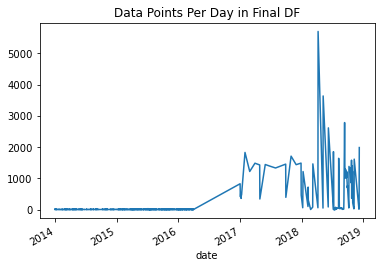

In [111]:
res.groupby("date").agg("count")["ticker"].plot()
plt.title("Data Points Per Day in Final DF");

In [114]:
print("The combined data set has ", len(res), " rows.")
print("The earliest date is: ", res["date"].min(),".")
print("The latest date is: ",  res["date"].max(),".")

The combined data set has  233274  rows.
The earliest date is:  2013-12-31 23:10:08+00:00 .
The latest date is:  2018-12-09 00:00:00+00:00 .


In [116]:
def export_as_csv(df, path):
    try:
        df.to_csv(path)
        print("Success")
    except:
        print("Unable to save to .csv")

In [118]:
export_as_csv(res, "combined_data.csv")

Success
